In [1]:
## 1. Import Libraries & Create Synthetic Housing Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Synthetic dataset
np.random.seed(42)
size = np.random.randint(800, 3500, 200)
rooms = np.random.randint(2, 7, 200)
age = np.random.randint(1, 30, 200)

price = (size*120) + (rooms*5000) - (age*800) + np.random.randint(10000, 50000, 200)

df = pd.DataFrame({
    'Size_sqft': size,
    'Rooms': rooms,
    'Age_Years': age,
    'Price': price
})

df.head()

,Size_sqft,Rooms,Age_Years,Price
0,1660,5,16,243077
1,2094,4,29,297161
2,1930,4,7,283569
3,1895,2,5,266722
4,2438,6,22,334025


In [3]:
## 2. Split Data
X = df[['Size_sqft', 'Rooms', 'Age_Years']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
## 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
## 4. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained!")

Model trained!


In [6]:
## 5. Evaluate Model
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(np.float64(10960.518068875374), 0.9805397875668788)

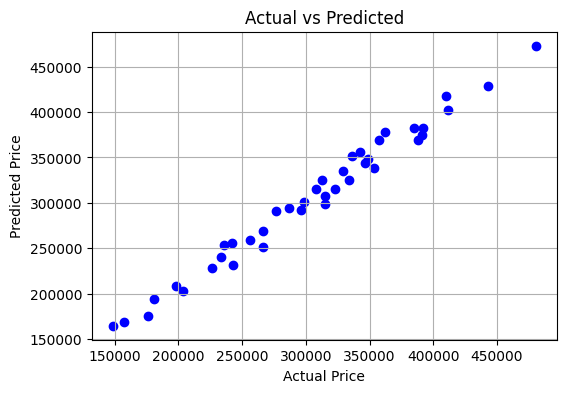

In [7]:
## 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [9]:
## 7. Save Model & Scaler
joblib.dump(model, "house_price_model.joblib")
joblib.dump(scaler, "house_price_scaler.joblib")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [11]:
## 8. Load Model & Predict New Sample
loaded_model = joblib.load("house_price_model.joblib")
loaded_scaler = joblib.load("house_price_scaler.joblib")

sample = [[1500, 3, 10]]  # [Size_sqft, Rooms, Age_Years]
sample_scaled = loaded_scaler.transform(sample)

pred_price = loaded_model.predict(sample_scaled)[0]
print(f"Predicted Price for house with {sample[0][0]} sqft, {sample[0][1]} rooms, {sample[0][2]} years old: ${pred_price:,.2f}")
pred_price

Predicted Price for house with 1500 sqft, 3 rooms, 10 years old: $219,583.40


d:\DevTools\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(219583.39915239462)